/Users/henrymoore/Documents/GitHub/mathematics-and-ai/weekly-projects/week3/PandasBears/Train/Pandas /Users/henrymoore/Documents/GitHub/mathematics-and-ai/weekly-projects/week3/PandasBears/Train/Bears /Users/henrymoore/Documents/GitHub/mathematics-and-ai/weekly-projects/week3/PandasBears/Test/Pandas /Users/henrymoore/Documents/GitHub/mathematics-and-ai/weekly-projects/week3/PandasBears/Test/Bears Resized image shape: (128, 128)
Matrix shape: (500, 16384)


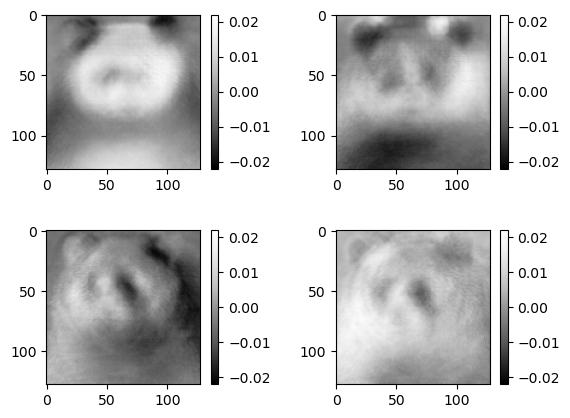

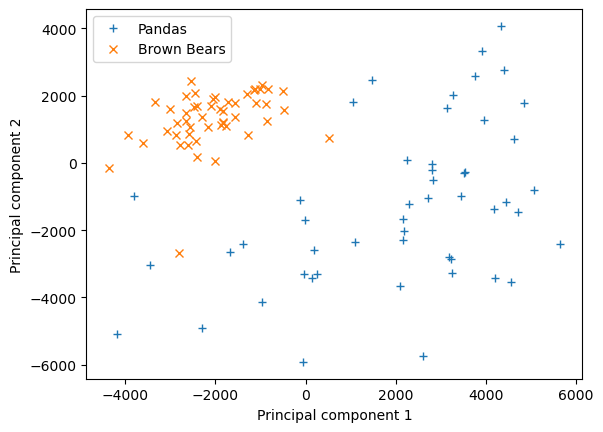

Shape of A before any operation: (500, 16384)
   k	|  # errors	| misclassified bears
--------------------------------------------
    1	|      1 	| [39]
    2	|      0 	| []
    3	|      3 	| [24 39 42]
    4	|      2 	| [39 42]
    5	|      3 	| [36 39 42]
    6	|      3 	| [36 39 42]
    7	|      6 	| [11 22 36 39 41 42]
    8	|      5 	| [11 22 39 41 42]
    9	|      7 	| [ 6 11 22 36 39 41 42]
    10	|      5 	| [ 6 22 39 41 42]
    11	|      6 	| [ 6 22 24 39 41 42]
    12	|      6 	| [ 6 22 24 39 41 42]
    13	|      7 	| [ 6 11 22 24 39 41 42]
    14	|      7 	| [ 6 11 22 24 39 41 42]
    15	|      9 	| [ 6 11 21 22 24 36 39 41 42]


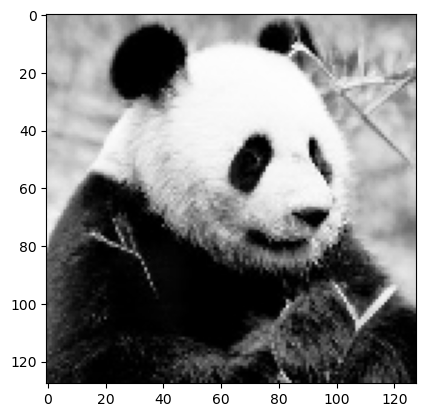

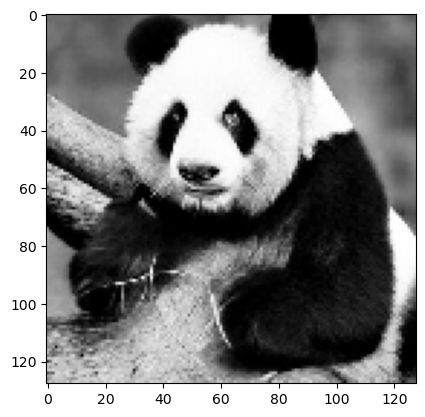

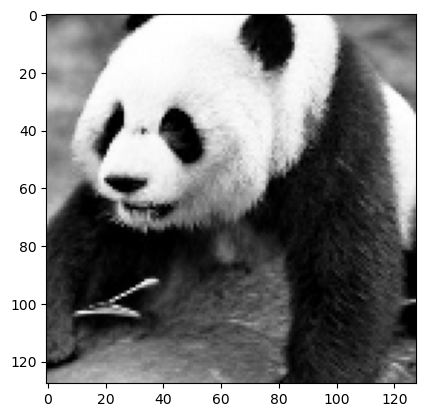

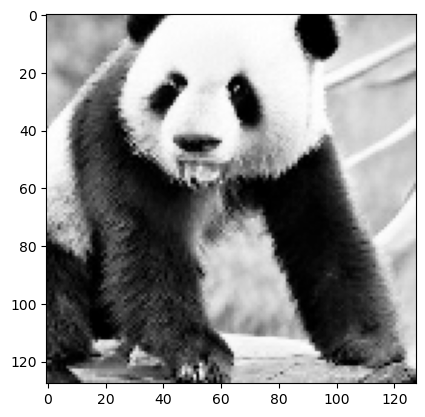

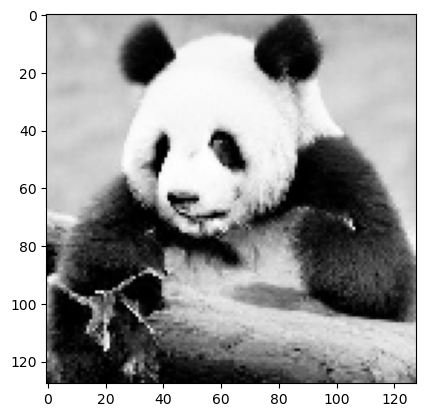

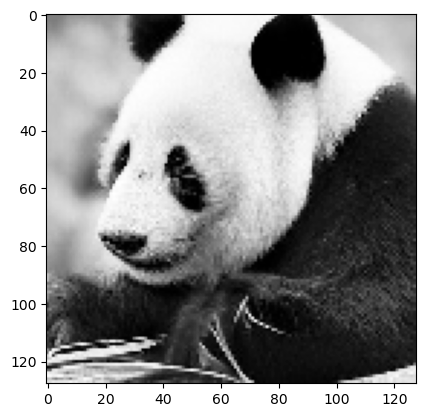

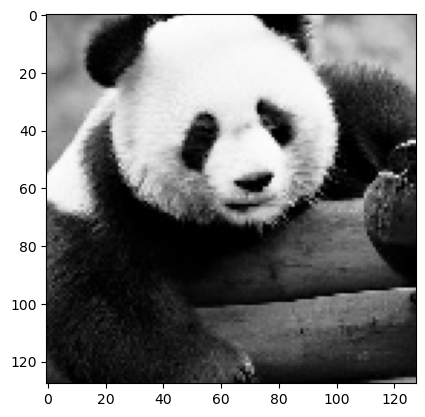

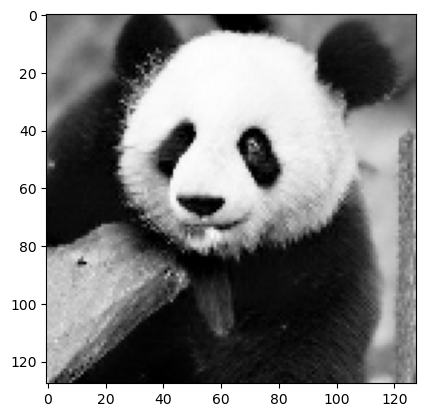

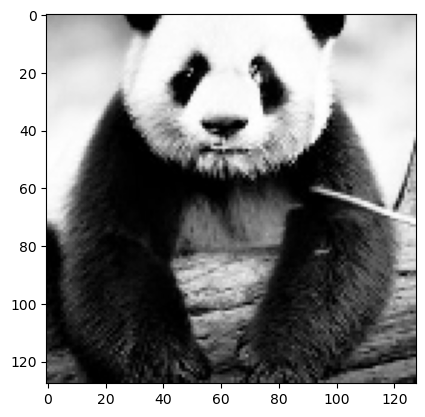

/opt/homebrew/Caskroom/miniforge/base/envs/mathai/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74        50
         1.0       1.00      0.30      0.46        50

    accuracy                           0.65       100
   macro avg       0.79      0.65      0.60       100
weighted avg       0.79      0.65      0.60       100

Confusion Matrix:
[[50  0]
 [35 15]]
LDA Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68        50
         1.0       1.00      0.08      0.15        50

    accuracy                           0.54       100
   macro avg       0.76      0.54      0.42       100
weighted avg       0.76      0.54      0.42       100

Confusion Matrix:
[[50  0]
 [46  4]]
QDA Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        50
         1.0       0.51      1.00      0.67        50

    accurac

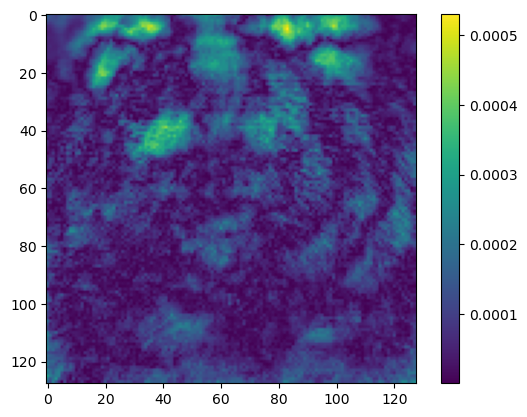

In [30]:
# Authors: Henry Moore, with help from Divik Verma
# Date: July 16, 2024
# Assigmnent: Math 76.01 Homework 3, "Eigenbears"
# Answers to questions included at the end

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os, time
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

# toggle settings
add_noise = False

# Initiliaze lists for image collection
train_images = []
test_images = []

# Paths for training and test datasets
train_paths = ['/Users/henrymoore/Documents/GitHub/mathematics-and-ai/weekly-projects/week3/PandasBears/Train/Pandas',
               '/Users/henrymoore/Documents/GitHub/mathematics-and-ai/weekly-projects/week3/PandasBears/Train/Bears']
test_paths = ['/Users/henrymoore/Documents/GitHub/mathematics-and-ai/weekly-projects/week3/PandasBears/Test/Pandas',
               '/Users/henrymoore/Documents/GitHub/mathematics-and-ai/weekly-projects/week3/PandasBears/Test/Bears']

# Dataset paths
datasets = [train_paths, test_paths]

for i, dataset_paths in enumerate(datasets):

    # Determine if it's training or testing dataset
    datasetname = ['Train', 'Test'][i]
    images = train_images if i == 0 else test_images
    
    for folder_path in dataset_paths:

        # print the name of the folder that is currently being processed
        print(folder_path, end=' ')
        
        # go through all files in the folder
        file_count = 0
        for filename in os.listdir(folder_path):
            
            # find the files that are JPEGs
            if filename.endswith(".jpg") or filename.endswith(".jpeg"):

                # add 1 to the file count
                file_count += 1
                
                # Construct full file path
                file_path = os.path.join(folder_path, filename)
    
                # import image
                image = plt.imread(file_path, format='jpeg')
    
                # convert to gray scale
                image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    
                # decrease image size by 50%
                image = image[::2,::2]

                if add_noise:
                    # add some noise
                    image = image + np.random.normal(scale=100, size=image.shape)
    
                # add the new image to collection
                images.append(image)

# look at 4 random bears
for i0, i in enumerate(np.random.randint(0, 500, size=4)):
    plt.subplot(2,2,1+i0)
    plt.imshow(train_images[i][::2,::2],cmap='Greys_r')

# Assume train_images is a list of 2D numpy arrays (grayscale images)
images_resized = [np.array(Image.fromarray(img).convert('L').resize((128, 128))) for img in train_images]

# Flatten each image to a 1D array and stack them into a matrix where each image is a row
images_matrix = np.stack([img.flatten() for img in images_resized])

# Compute the average image from the training data
avg_image = np.mean(images_matrix, axis=0)

# Subtract the average from each image to center the data
centered_images = images_matrix - avg_image
A = centered_images  # Now A should be (samples, features) i.e., (500, 16384) if you have 500 images

# Perform SVD on the mean-centered data
U, S, Vh = np.linalg.svd(A, full_matrices=False)

# Resize images to 128x128 and convert them to numpy arrays, ensuring all images are grayscale
images_resized = [np.array(Image.fromarray(img).convert('L').resize((128, 128))) for img in train_images]

# Check image size
print("Resized image shape:", images_resized[0].shape)  # Should be (128, 128)

# Flatten each image to a 1D array and stack them into a matrix
images_matrix = np.stack([img.flatten() for img in images_resized])
print("Matrix shape:", images_matrix.shape)  # Should be (number of images, 128*128)

# show the first four eigenbears
test_images_flat = [img.flatten() for img in test_images]  # Flatten each image
mean_image = np.mean(np.stack(test_images_flat), axis=0)  # Calculate mean from the training set or directly here if not done
centered_test_images = [img - mean_image for img in test_images_flat]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    # Reshape the ith row of Vh to the original image dimensions
    #change it to be vh based on the transpose to fit the original dimensions
    eigenbear = Vh[i].reshape((128, 128))
    #force colormap to be the same for all four
    plt.imshow(eigenbear, cmap='Greys_r', vmin=-np.max(np.abs(Vh[:4, :])), vmax=np.max(np.abs(Vh[:4, :])))
    plt.colorbar()  # Display colorbar for scale
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust space between plots for clarity
plt.show()

# Clustering of panda bears and brown bears along the first and second principal component
# indices of pandas in the test set
indices_pandas = range(50)
indices_brownbears = range(50,100)

for i, indices in enumerate([indices_pandas, indices_brownbears]):
    # Get projections of data onto principal component 1
    p1 = [np.dot(Vh[0], centered_test_images[x]) for x in indices]  # Use the first row of Vh for PC1
    # Get projections of data onto principal component 2
    p2 = [np.dot(Vh[1], centered_test_images[x]) for x in indices]  # Use the second row of Vh for PC2
    plt.plot(p1, p2, marker='+x'[i], lw=0, label=['Pandas', 'Brown Bears'][i])

# Annotate axes
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
# Add legend
plt.legend()
plt.show()

# construct response variable: Train set was created by appending 250 pandas
# and THEN 250 brown bears to the list of training images. We code pandas as
# '0' and brown bears as '1'.
y_train =  np.concatenate([np.zeros(250), np.ones(250)])

# Test set was created by appending 50 pandas and THEN 50 brown bears to the
# list of test images. We code pandas as '0' and brown bears as '1'.
y_test = np.concatenate([np.zeros(50), np.ones(50)])

# Verify the shape of A
print("Shape of A before any operation:", A.shape)

# Ensure A is shaped (500, 16384), if not, transpose it correctly
if A.shape[0] != 500:
    A = A.T
    print("Transposed A for correct orientation, new shape:", A.shape)

errors_list = []

# Now, fit the model with A without transposing
print('   k\t|  # errors\t| misclassified bears')
print('--------------------------------------------')
for k in range(1, 16):
    # Fit KNN model
    modelKN = KNeighborsClassifier(n_neighbors=k).fit(A, y_train)

    # Use model to make predictions on the test set
    # Ensure test images are also shaped correctly before prediction
    predictions = [modelKN.predict([centered_test_images[i]]) for i in range(len(y_test))]

    # Detect misclassifications
    errors = np.abs(np.array(predictions).flatten() - y_test)  # Ensure predictions are correctly flattened
    for i in np.argwhere(errors).T[0]:
        errors_list.append(i)
    # Print results to table
    print('    {}\t|      {} \t| {}'.format(k, int(np.sum(errors)), np.argwhere(errors).T[0]))

# Show hard-to-classify bears
unique_errors = np.unique(errors_list)
for i in unique_errors:
    if errors_list.count(i) >= 1:
      plt.imshow(test_images[i], cmap='Greys_r')
      plt.show()

test_images = np.array(test_images).reshape(len(test_images), -1)  # Flatten each image into a 1D array

#create the logistic model
logistic_model = LogisticRegression(max_iter=5000)
lda_model = LinearDiscriminantAnalysis()
qda_model = QuadraticDiscriminantAnalysis()

# Train the models
logistic_model.fit(A, y_train)
lda_model.fit(A, y_train)
qda_model.fit(A, y_train)

#predict
logistic_predictions = logistic_model.predict(test_images)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logistic_predictions))

# LDA predictions and evaluation
lda_predictions = lda_model.predict(test_images)
print("LDA Classification Report:")
print(classification_report(y_test, lda_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lda_predictions))

# QDA predictions and evaluation
qda_predictions = qda_model.predict(test_images)
print("QDA Classification Report:")
print(classification_report(y_test, qda_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, qda_predictions))

# Construct the bear mask:
# Show absolute value of logistic-regression coefficients for each pixel
plt.imshow(np.abs((logistic_model.coef_).reshape((128,128))))
plt.colorbar()

#2.4: The brown bears are noticeably more clustered on the graph than the pandas i.e, the panda images have greater variance in their PCA 1 and 2 values. There is also a strong boundary between the two bears; no pandas are in the main brown bear cluster, and there are very few brown bear outliers in the panda territory.

#3.3,3.4: The misclassified bears are all pandas. In many of the images, one of their eyes is partially or partially obscured by their nose, or an ear is out of frame. These are the parts that differentiate them most from the brown bears, so it would be harder to classify them without those aspects.

#4.2: The Linear and LDA models still identify 100% of bears, with the Linear identified more pandas (59%) than the LDA (52%). The QDA, alternatively, got all the pandas but only 51% of the bears. This gives the logistic regression the highest overall precision, but they’re all comparable.

#4.3: The parametric model shows much higher accuracy than any of the non-parametric models.

#4.4: The most “important” pixels are in the eyes and ears.

#5.2: The addition of noise greatly increases the test accuracy. This is because our model was initially overfitted to the test data, but the noise made the test images more similar, which allowed for less variance in our modeling.

#5.3: The eigenbears in the noisy model simply have more “noise” than those from the noise-free model. Aside from that, the eigenbears look very similar between the two-models. A similar phenomenon is seen in the “bear mask,” where the mask from the noisy model is comparable to the noiseless one apart from being “noisy” in texture. The two masks appear visually quite similar (with ears and eyes having the greatest influence), and their scales also display similar values.
